#  コンテンツ
- 全周ベジエ近似についての考察
- 曲率関数

## 1. 全周ベジエ近似についての考察


ベジエ曲線は円などの閉曲線を正確に記述することはできない。（複数のセグメントに分けて区分的に近似することはできる）

また、始点、終点をどこにでも設定できるため回転不変性はないので、全周を近似するためには、人間が始点・終点を指定するか、あるいは回転不変な特徴点を基準にして始点・終点を定めざるを得ない。逆に言えば、そのような点が設定できるのであれば自動で近似可能であるとも言える。

例えば、

- 曲率最大点
- 重心から最短の輪郭点。逆に最遠の輪郭点
- 最も遠い輪郭点のペアのうちの１点

などの方法も考えられる。

N005 で示したダイコン画像の自動分割のアルゴリズムでは、対称性を尺度として上下端点を見つけたが、その２つの点を起点とするというのも手である。


## 2. 曲率関数

N005 で既に示したことであるが、パラメトリック曲線の曲率は、

$$\frac{1}{R}=\frac{(x'(t)y''(t) - y'(t)x''(t))}{(x'(t)^2 + y'(t)^2)^{3/2}}$$

で表せる。ベジェ曲線もパラメトリック曲線であるので、この式が有効である。


-　[曲率・曲率半径 (curvature and radius of curvature)](http://w3e.kanazawa-it.ac.jp/math/category/kika/heimenkika/henkan-tex.cgi?target=/math/category/kika/heimenkika/curvature.html)

-　[ベジェ曲線の曲率](http://geom.web.fc2.com/geometry/bezier/curvature.html)


曲率、あるいは曲率の出現パターンは形状の特徴のひとつであろう。

ベジエ近似の応用として、図形輪郭の曲率分布を求めてみよう。

In [1]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# from sympy import *
from sympy import diff,Symbol,Matrix,symbols,solve,simplify,binomial
from sympy.abc import a,b,c
# init_session()
from sympy import var
# px,py =var('px:4'),var('py:4')

# Google Colaboratory の MyDrive パス
COLABRDROOT = "/content/drive/My Drive/RadiShLab"

# ホーム
LOCALHOME = "."  # フォルダを絶対指定するならここを書き変えてください

# 環境判定（Google Colaboratory かどうかの判定）
try:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append(COLABRDROOT+'/rdlib')
    COLABORATORY = True
except ImportError:
    sys.path.append('./rdlib')
    COLABORATORY = False
import rdlib4 as rd

# フォルダ指定
labhome = COLABRDROOT if COLABORATORY else LOCALHOME

NSilF = labhome+'/RDSamples/NSilImages' # 正規化されたシルエット画像のフォルダ
imgs = rd.collectimages(NSilF)       # シルエット画像のリスト

In [2]:
# 曲率関数
def showCurvature(img,mode=0):
    # mode 0 ー＞　輪郭線を上端で開く、 mode 1 ー＞下端で開く
    # 全周輪郭を得る
    if mode != 0 and mode != 1:
        return
    # 輪郭の輪郭を抽出し開いた輪郭を得る
    conAll = rd.getCntPairWithImg(img,mode=mode,dtopdr=3,dbtmdr=3)
    # サンプリング
    Samples = rd.getSamples(conAll,N=64,mode='Equidistant')
    # ベジエ曲線のインスタンスを生成
    bez = rd.BezierCurve(N=8,samples=Samples) #  （N006参照）
    # ベジエ曲線で近似
    cps,fall = bez.fit2(Nfrom=6,Nto=15)
    # 曲線の式をもとに曲率の式を算出する
    kf = rd.curvature(fall)
    t= symbols('t')
    # 描画準備
    ra = np.linspace(0,1,101) # [0,1]区間を100分割
    kdata = [kf.subs(t,s) for s in ra] # 各点の曲率を計算
    # 描画
    plt.figure(figsize=(7,4),dpi=100)
    plt.subplot(121)
    plt.plot(ra,kdata)
    # 曲率最大点を求める
    maxindex, cnt = rd.maxCurvatureP(img,Samples)
    x,y = cnt[maxindex] # 曲率最大点の輪郭座標
    plt.subplot(122)
    plt.imshow(img)
    plt.scatter(x,y,marker='x')



6..........

7..........

8..........

9..........

10..........

11..

12...

13..

14..



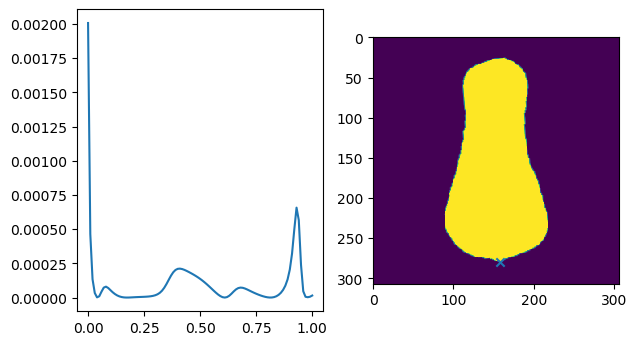

In [11]:
showCurvature(imgs[0],mode=0)


0.0424349335095053 0.00346966263575028



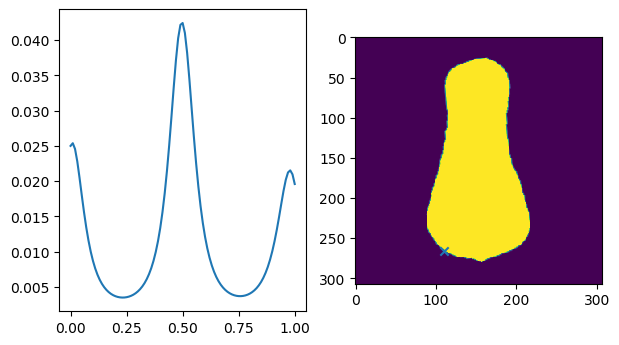

In [3]:
# 曲率関数
def showCurvature(img,mode=0):
    # mode 0 ー＞　輪郭線を上端で開く、 mode 1 ー＞下端で開く
    # 全周輪郭を得る
    if mode != 0 and mode != 1:
        return
    # 輪郭の輪郭を抽出し開いた輪郭を得る
    conAll = rd.getCntPairWithImg(img,mode=mode,dtopdr=3,dbtmdr=3)
    # サンプリング
    Samples = rd.getSamples(conAll,N=64,mode='Equidistant')
    # ベジエ曲線のインスタンスを生成
    bez = rd.BezierCurve(N=4,samples=Samples) #  （N006参照）
    # ベジエ曲線で近似
    cps,fall = bez.fit0()
    # 曲線の式をもとに曲率の式を算出する
    kf = rd.curvature(fall)
    t= symbols('t')
    # 描画準備
    ra = np.linspace(0,1,101) # [0,1]区間を100分割
    kdata = [kf.subs(t,s) for s in ra] # 各点の曲率を計算
    print(np.array(kdata).max(),np.array(kdata).min())
    # 描画
    plt.figure(figsize=(7,4),dpi=100)
    plt.subplot(121)
    plt.plot(ra,kdata)
    # 曲率最大点を求める
    maxindex, cnt = rd.maxCurvatureP(img,Samples)
    x,y = cnt[maxindex] # 曲率最大点の輪郭座標
    plt.subplot(122)
    plt.imshow(img)
    plt.scatter(x,y,marker='x')
showCurvature(imgs[0],mode=0)

# 曲率計算



In [9]:
bezX,bezY = bez.bezfunc
diffX1 = diff(bezX,t)
diffY1 = diff(bezY,t)
diffX2 = diff(diffX1,t)
diffY2 = diff(diffY1,t)
R = (diffX1*diffX1+diffY1*diffY1)**(3/2)/(diffX1*diffY2-diffY1*diffX2)
Rinv = 1/R

# 曲率をパラメータの関数としてグラフ化

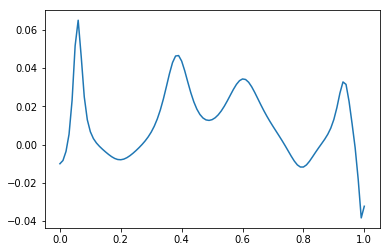

In [10]:
kyokuritsu = [Rinv.subs(t,s) for s in np.linspace(0,1,101)]
plt.plot(np.linspace(0,1,101),kyokuritsu)

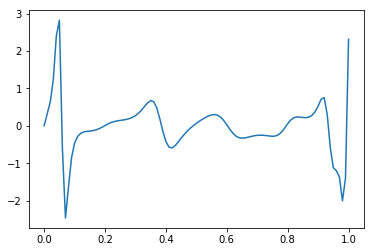

In [11]:
# 極値を求めるために曲率を微分しグラフ化
diffRinv=diff(Rinv,t)
RinvS=simplify(diffRinv)
plt.plot(np.linspace(0,1,101),[RinvS.subs(t,s) for s in np.linspace(0,1,101)])

In [12]:
# findroot 関数で求解するには　変数がxでないといけないようなので、t　を　x　に置き換え
from scipy import optimize
from sympy import lambdify
x = var('x')
RinvS.subs(t,x)

-(((3186727.21358514*x**12 + 61743088.0526275*x**11*(x - 1) + 154456408.443426*x**10*(x - 1)**2 - 881141543.392411*x**9*(x - 1)**3 - 3851318739.66575*x**8*(x - 1)**4 - 5317688148.00973*x**7*(x - 1)**5 - 3361089699.7526*x**6*(x - 1)**6 - 857673059.165976*x**5*(x - 1)**7 + 328349050.405228*x**4*(x - 1)**8 + 631626861.244584*x**3*(x - 1)**9 + 325695621.004932*x**2*(x - 1)**10 + 50652183.7167648*x*(x - 1)**11 + 1275248.21255871*(x - 1)**12)*(1436.9817286681*x**14 + 56833.2430592036*x**13*(x - 1) + 1255826.71389048*x**12*(x - 1)**2 + 6746048.12326418*x**11*(x - 1)**3 + 16490346.4526125*x**10*(x - 1)**4 + 13896532.9919754*x**9*(x - 1)**5 + 17000129.5379644*x**8*(x - 1)**6 + 35679137.6465859*x**7*(x - 1)**7 + 22305949.7609493*x**6*(x - 1)**8 - 13286882.3978584*x**5*(x - 1)**9 - 19699579.1512404*x**4*(x - 1)**10 - 6883022.19196168*x**3*(x - 1)**11 - 1203517.34041076*x**2*(x - 1)**12 - 55926.2975659664*x*(x - 1)**13 - 1445.70149369552*(x - 1)**14) - (4250848.42193784*x**12 + 109621956.923564*x*

# findroot solver 

数値解法で解を求める

https://docs.sympy.org/0.7.0/modules/mpmath/calculus/optimization.html?highlight=findroot#mpmath.findroot

In [17]:
# 曲率の高い点を７点求めてみる

mp.dps = 100
ans1 =  findroot(lambda x:RinvS.subs(t,x),0.05,solver='mnewton')
ans2 = findroot(lambda x:RinvS.subs(t,x),0.25,solver='mnewton')
ans3 = findroot(lambda x:RinvS.subs(t,x),[0.26,0.4],solver='ridder')
ans4 =  findroot(lambda x:RinvS.subs(t,x),0.42,solver='mnewton')
ans5 = findroot(lambda x:RinvS.subs(t,x),0.5)
ans6 = findroot(lambda x:RinvS.subs(t,x),0.8,solver='halley')
ans7 =  findroot(lambda x:RinvS.subs(t,x),[0.9,0.98],solver='ridder')
ans1,ans2,ans3,ans4,ans5,ans6,ans7

(mpf('0.05850141541454999'),
 mpf('0.19758397437285478'),
 mpf('0.3856515636965859'),
 mpf('0.48889538888029779'),
 mpf('0.60266648293248942'),
 mpf('0.79498710236796766'),
 mpf('0.93362935287426352'))

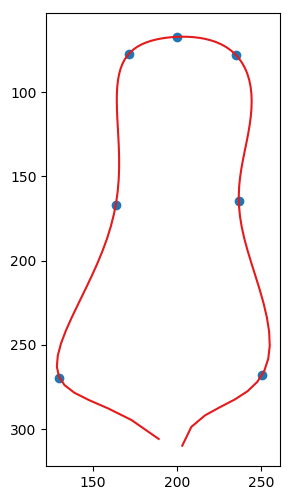

In [18]:
# 曲率の高い点をプロット
    
plt.figure(figsize=(6,6),dpi=100)
plt.gca().invert_yaxis() 
plt.gca().set_aspect('equal', adjustable='box') # アスペクト比を１：１に
bez.drawBez()
X1 = bez.bezfunc[0].subs(t,ans1)
Y1=bez.bezfunc[1].subs(t,ans1)
X2 = bez.bezfunc[0].subs(t,ans2)
Y2=bez.bezfunc[1].subs(t,ans2)
X3 = bez.bezfunc[0].subs(t,ans3)
Y3=bez.bezfunc[1].subs(t,ans3)
X4 = bez.bezfunc[0].subs(t,ans4)
Y4=bez.bezfunc[1].subs(t,ans4)
X5 = bez.bezfunc[0].subs(t,ans5)
Y5=bez.bezfunc[1].subs(t,ans5)
X6 = bez.bezfunc[0].subs(t,ans6)
Y6=bez.bezfunc[1].subs(t,ans6)
X7 = bez.bezfunc[0].subs(t,ans7)
Y7=bez.bezfunc[1].subs(t,ans7)
plt.scatter([X1,X2,X3,X4,X5,X6,X7],[Y1,Y2,Y3,Y4,Y5,Y6,Y7])